# PROBLEM DEFINITION

## Objective

To categorise the countries using socio-economic and health factors that determine the overall development of the country.

## Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. 

It has been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. 

So, CEO has to make decision to choose the countries that are in the direst need of aid. 

Hence, our Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. 

Then we need to suggest the countries which the CEO needs to focus on the most.

## Dataset Info

[Unsupervised Learning on Country Data](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data)

**Note** : This data resembles the situation of around `2010`.

Data Description:

| **Variable**     | **Description**                                                                                   |
|------------------|---------------------------------------------------------------------------------------------------|
| `Name of the country` | Name of the country                                                                              |
| `child_mort`     | Death of children under 5 years of age per 1000 live births                                       |
| `exports`        | Exports of goods and services per capita (% of GDP per capita)                                   |
| `health`         | Total health spending per capita (% of GDP per capita)                                           |
| `imports`        | Imports of goods and services per capita (% of GDP per capita)                                   |
| `income`         | Net income per person                                                                            |
| `inflation`      | Annual growth rate of the total GDP                                                              |
| `life_expec`     | Average number of years a newborn child would live if current mortality patterns remain the same |
| `total_fer`      | Number of children born per woman if current age-fertility rates remain the same                |
| `gdpp`           | GDP per capita (Total GDP divided by total population)                                           |

# Importing Libraries

In [1]:
!pip install country_converter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 1.5 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px 
import country_converter as coco 
import plotly.graph_objects as go

# Loading Data

In [4]:
df = pd.read_csv('/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv')

# EDA

## Data Overview

In [5]:
df.shape

(167, 10)

In [6]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
df['country'].nunique()

167

## EDA Summary

- The dataset consists of 167 different countries.
- The dataset doesn't contain any null value.
- The minimum and maximum values across columns are reasonable.

# Preprocessing

In [11]:
# Create a dataframe consisting only of the required columns to be used in analysis
X = df.drop('country', axis=1)

## Scale

In [12]:
# Scaler to normalize all the columns to have a similar range of values
sc = StandardScaler()

In [13]:
# Fit and transform the data to scale
X_scaled = sc.fit_transform(X)

# Model Building

## Optimal K

In [14]:
# Range of k values to test
k_range = range(2, 11)

# List to hold WCSS and silhouette values
wcss = []
silhouette_scores = []

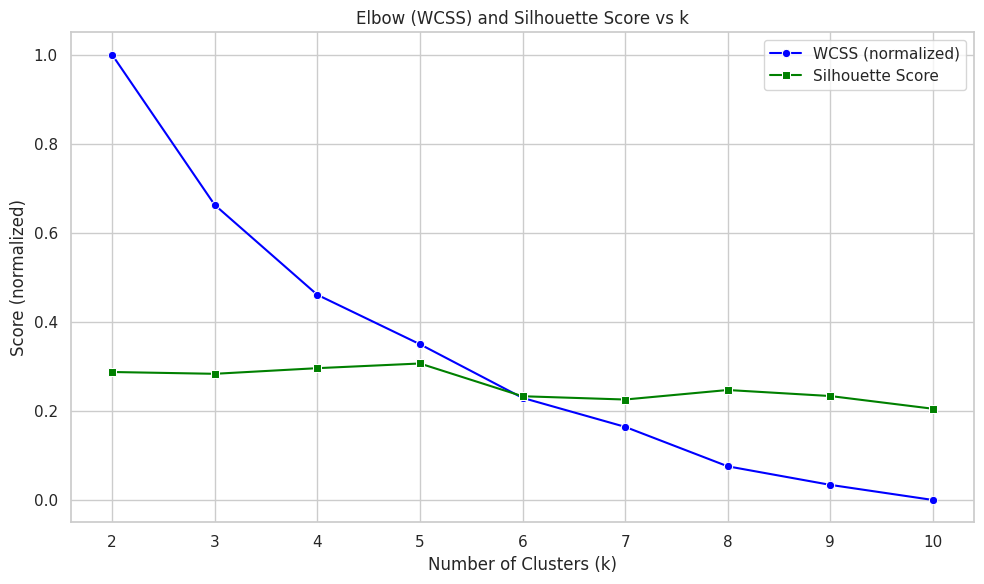

In [15]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=45)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)

# Normalize WCSS for same scale
scaler = MinMaxScaler()
wcss_scaled = scaler.fit_transform([[v] for v in wcss])
wcss_scaled = [v[0] for v in wcss_scaled]

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot WCSS (normalized)
sns.lineplot(x=list(k_range), y=wcss_scaled, marker='o', label='WCSS (normalized)', color='blue')

# Plot Silhouette Score
sns.lineplot(x=list(k_range), y=silhouette_scores, marker='s', label='Silhouette Score', color='green')

# Labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score (normalized)')
plt.title('Elbow (WCSS) and Silhouette Score vs k')
plt.legend()
plt.tight_layout()
plt.show()

Choosing number of clusters to be 5 as silhouette score peaks there and wcss score starts stabilizing.

## K-Means

In [16]:
# Fit the model
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [17]:
# Get labels
labels = kmeans.labels_

In [18]:
# Append labels back to original dataframe
df['label'] = pd.Series(labels)

In [19]:
df.drop('country', axis=1).groupby('label').median()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,14.50,49.80,6.855,59.20,12050.0,2.635,73.95,1.935,6130.0
1,4.25,41.00,9.585,31.95,40900.0,1.190,80.45,1.870,43150.0
2,90.25,23.80,5.480,41.50,1860.0,8.855,59.40,5.085,833.0
3,20.90,27.05,5.080,30.60,9910.0,9.395,73.60,2.475,4610.0
4,2.80,175.00,7.770,154.00,72100.0,3.620,81.30,1.360,46600.0


`0`
- Low child mortality rate.
- High export.
- Good health score.
- Imports > Exports
- Good income.
- Low inflation.
- Low life expectancy.
- Low child per female rate.
- Moderate gdpp.

This can be labeled as `Moderately Developed` countries

`1`
- Low child mortality rate
- Good export.
- Highest health score.
- Imports < Exports
- Second highest income.
- Very low inflation.
- Second highest life expectancy.
- Very low child per female rate.
- Very high gdpp.

This can be labeled as `Developed` countries

`2`
- Highest child mortality rate.
- Lowest export.
- Low health score.
- Imports = Two times that of exports.
- Lowest income.
- High inflation.
- Lowest life expectancy.
- Highest number of child per female
- Lowest gdpp.

This can be labeled as `Least developed/Most Vulnerable` countries

`3`
- High child mortality rate.
- Very low export.
- Worst health rate.
- Imports > Exports
- Very low income.
- Highest inflation
- Low life expectancy
- High child per female rate.
- Second lowest gdpp.

This can be labeled as `Vulnerable developing` countries

`4`
- Lowest child mortality rate.
- Highest export.
- Good health rate.
- Highest imports. Still imports < export.
- Highest income.
- Stable economy.
- Highest life expectancy.
- Lowest number of child per female.
- Highest gdpp.

This can be labeled as `Elite` countries

In [20]:
label_mapping = {
    0: "Moderately developed",
    1: "Developed",
    2: "Least Developed/Most Vulnerable",    
    3: "Vulnerable developing",
    4: "Elite",
}

df['label'] = df['label'].map(label_mapping)

# Conclusion

In [21]:
# Convert country names to iso codes
df['iso_alpha'] = coco.convert(names=df['country'], to='ISO3') 

# Create a color map
color_map = {
        "Least Developed/Most Vulnerable": "red",
        "Vulnerable developing": "#FF4500",
        "Emerging": "#FFA500",
        "Moderately developed": "#ADFF2F",
        "Developed": "#7CFC00",
        "Elite": "green"
    }
# Choropleth code
choropleth = px.choropleth(
    df,
    locations="iso_alpha",
    color="label",
    hover_name="country",
    category_orders={"label": [
        "Least Developed/Most Vulnerable",
        "Vulnerable developing",
        "Moderately developed",
        "Developed",
        "Elite"
    ]},
    color_discrete_map=color_map,
    title="Development Categories by Country"
)

fig = choropleth

fig.update_geos(
    showcountries=True,
    showcoastlines=True,
    projection_type="natural earth",
    lataxis_range=[-60, 90],
    lonaxis_range=[-180, 180]
)

# Manual coordinates for small countries
tiny_countries = {
    'Malta': (35.8997, 14.5146),
    'Luxembourg': (49.8153, 6.1296),
    'Singapore': (1.3521, 103.8198)
}

# Filter your data to get only these countries
df_tiny = df[df['country'].isin(tiny_countries.keys())].copy()
df_tiny['lat'] = df_tiny['country'].apply(lambda x: tiny_countries[x][0])
df_tiny['lon'] = df_tiny['country'].apply(lambda x: tiny_countries[x][1])

# --- Add tiny country markers ---
for label, group in df_tiny.groupby("label"):
    fig.add_trace(go.Scattergeo(
        lon=group['lon'],
        lat=group['lat'],
        text=group['country'],
        mode='markers',
        marker=dict(
            size=5,
            color=color_map[label],
            line=dict(width=0.3, color='black')
        ),
        name=label,              # same legend name
        legendgroup=label,       # groups traces together
        showlegend=False         # don't show extra legend for this trace
    ))

# Show map
fig.show()

In [22]:
# List of most vulnerable countries
df[df['label']=='Least Developed/Most Vulnerable']['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
108     